In this notebook I want to figure out the code to take a snapshot of the bot looking in a direction

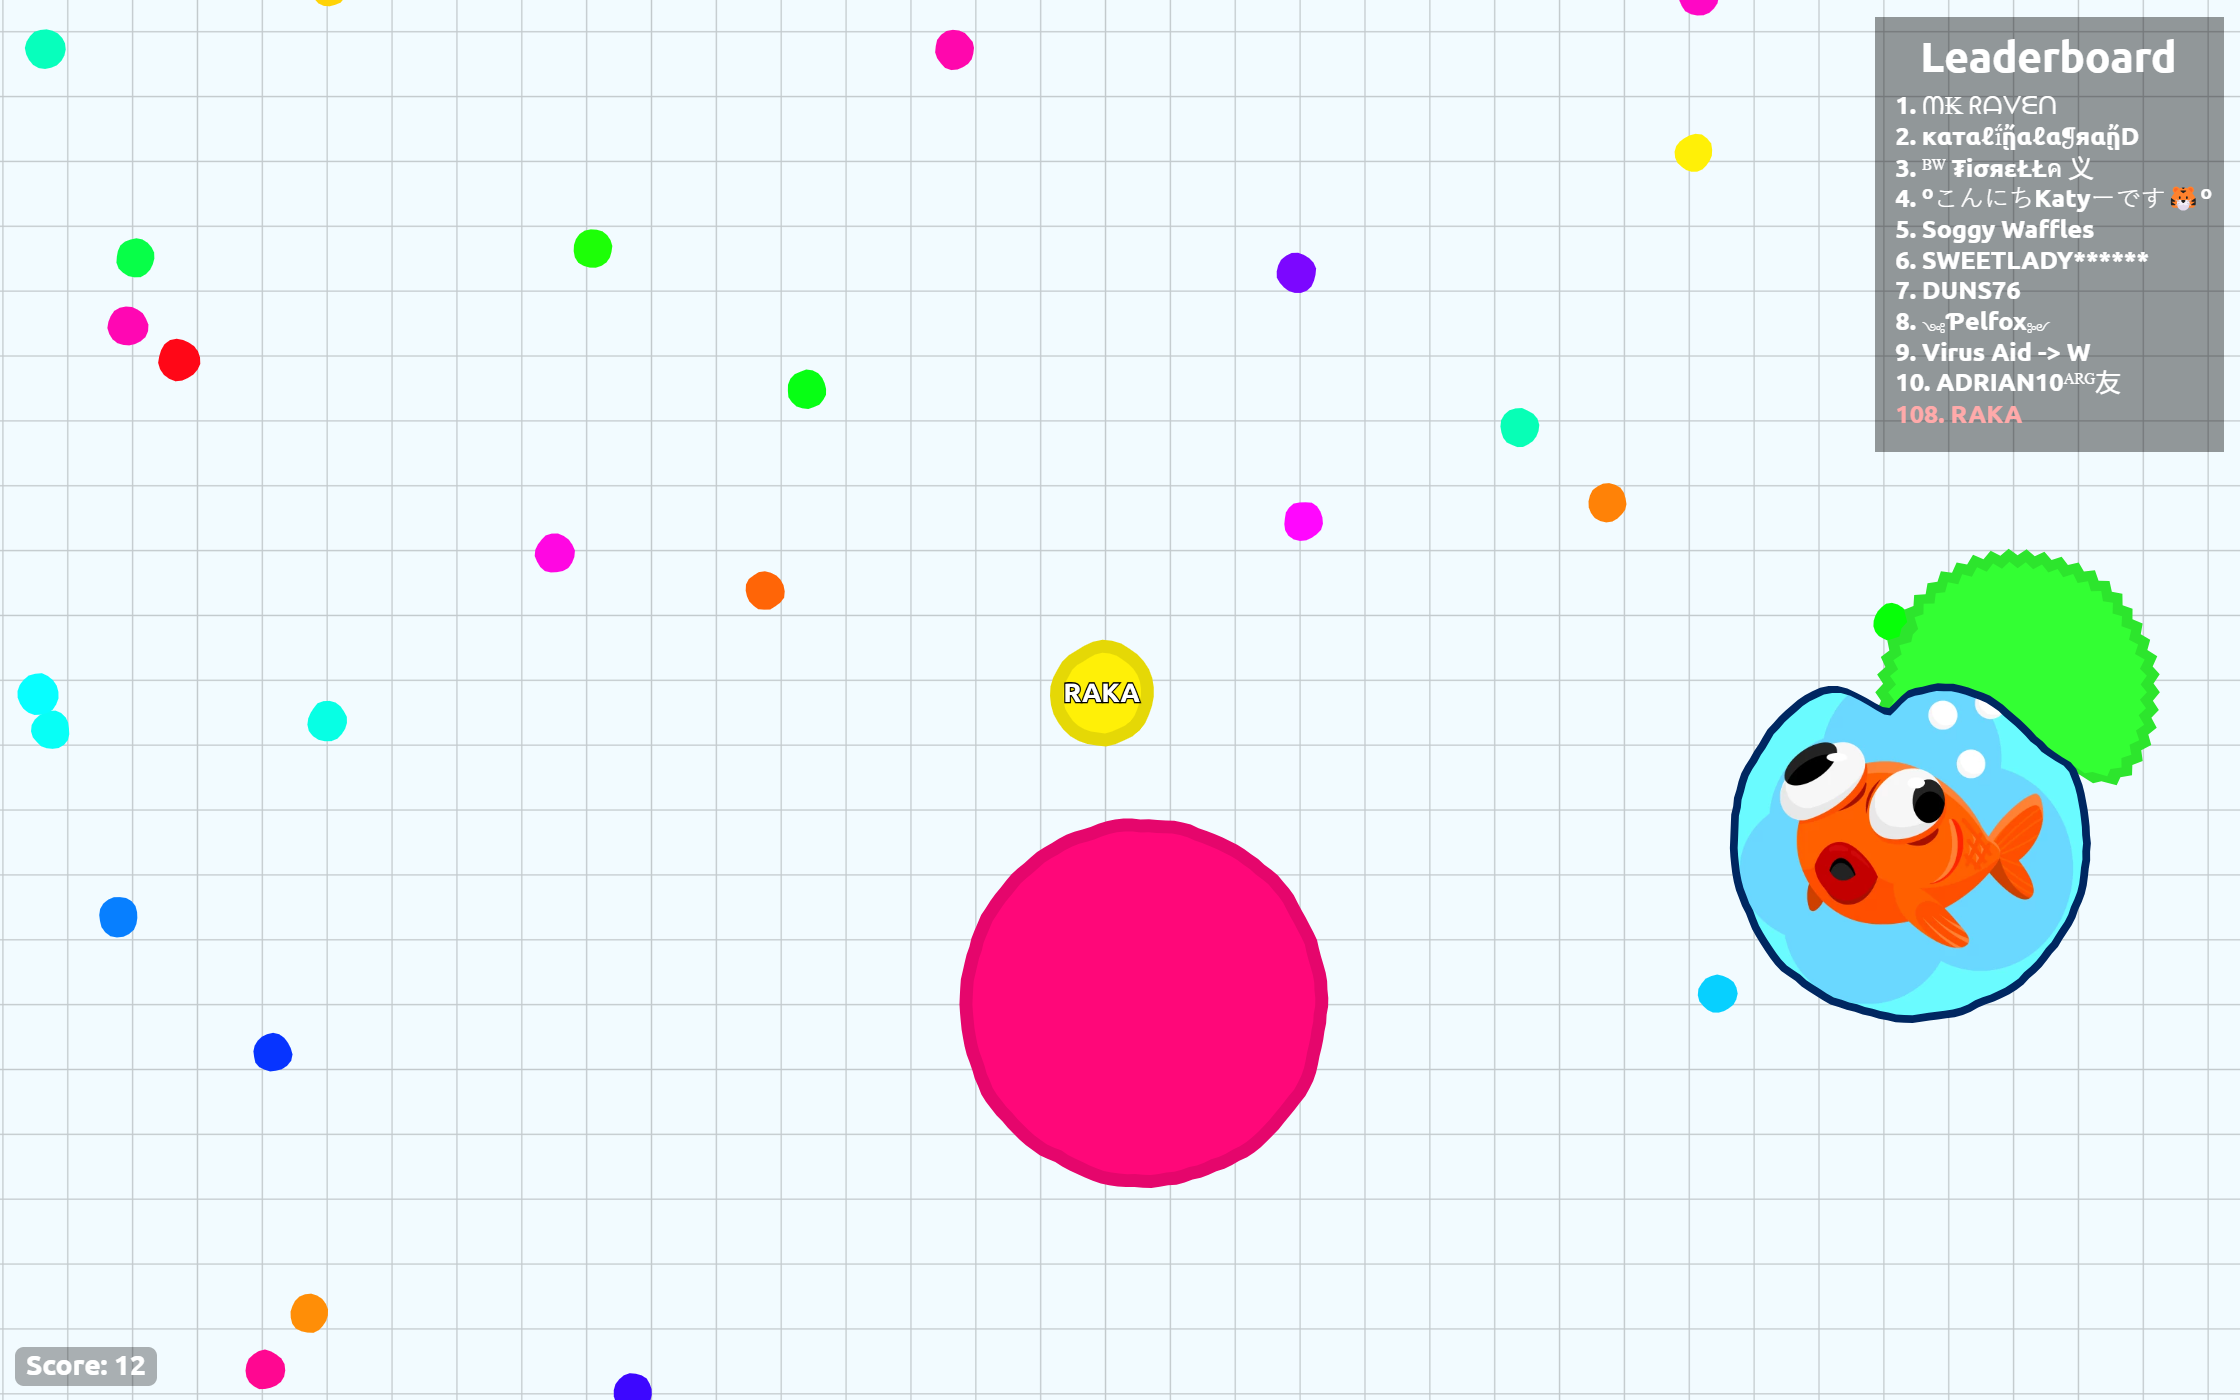

In [2]:
from PIL import Image
img = Image.open("data_imitation/0000000000-886x414.png")
img

In [4]:
from collections import Counter
colors = Counter(img.getdata())
color = max(colors, key=lambda i: colors[i])
color

(242, 251, 255)

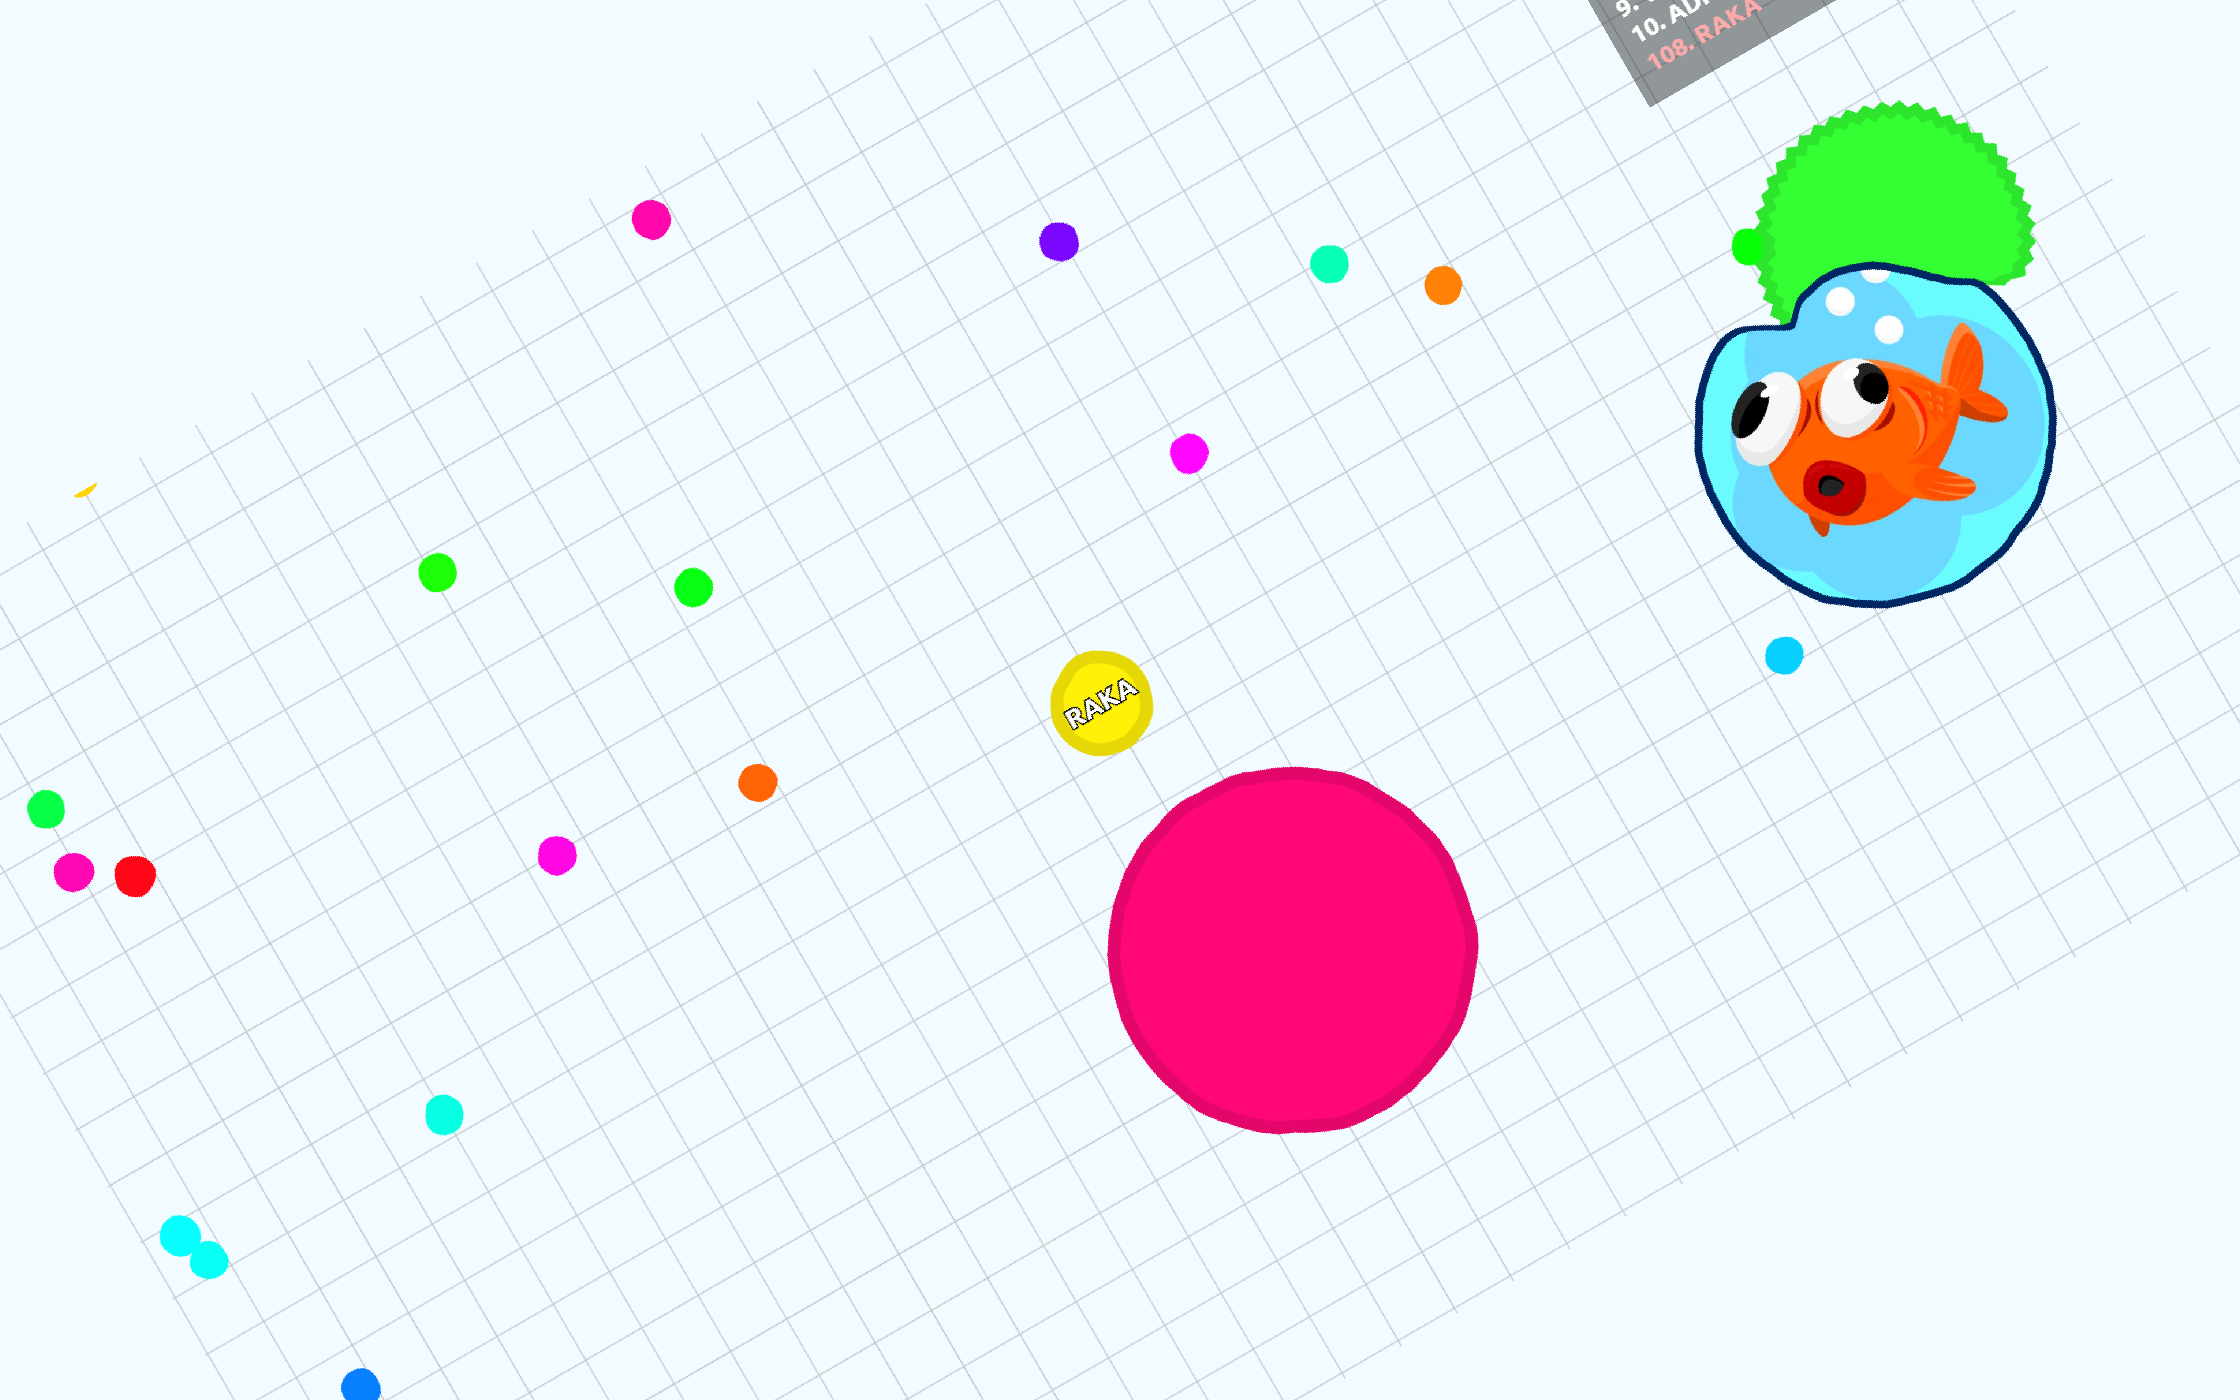

In [5]:
img.rotate(30, fillcolor=color)

In [6]:
import numpy as np
from math import ceil
w,h = img.size
d = ceil(np.linalg.norm(img.size))
w, h, d

(2240, 1400, 2642)

In [7]:
img_arr = np.asarray(img)
top = img_arr[0]
bot = img_arr[-1]
lef = img_arr[:,0]
rig = img_arr[:,-1]
[i.shape for i in [top,bot,lef,rig]]

[(2240, 3), (2240, 3), (1400, 3), (1400, 3)]

In [8]:
big = np.zeros((d,d,3)).astype(np.uint8)
s0 = (d-h)//2
s1 = (d-w)//2
s0,s1, big.shape

(621, 201, (2642, 2642, 3))

In [9]:
s0*2+h, s1*2+w

(2642, 2642)

In [10]:
np.stack([lef]*w, axis=1).shape

(1400, 2240, 3)

In [11]:
color = np.asarray(color).astype(np.uint8)

In [12]:
# big = np.zeros((d,d,3)).astype(np.uint8)

big = np.array([[color]*d]*d)
print(big.dtype)
big[s0:s0+h, 0:s1] = np.stack([lef]*s1, axis=1)
big[s0:s0+h, s1+w:] = np.stack([rig]*s1, axis=1)
big[0:s0, s1:s1+w] = np.stack([top]*s0)
big[s0+h:, s1:s1+w] = np.stack([bot]*s0)
big[s0:s0+h, s1:s1+w] = img_arr

uint8


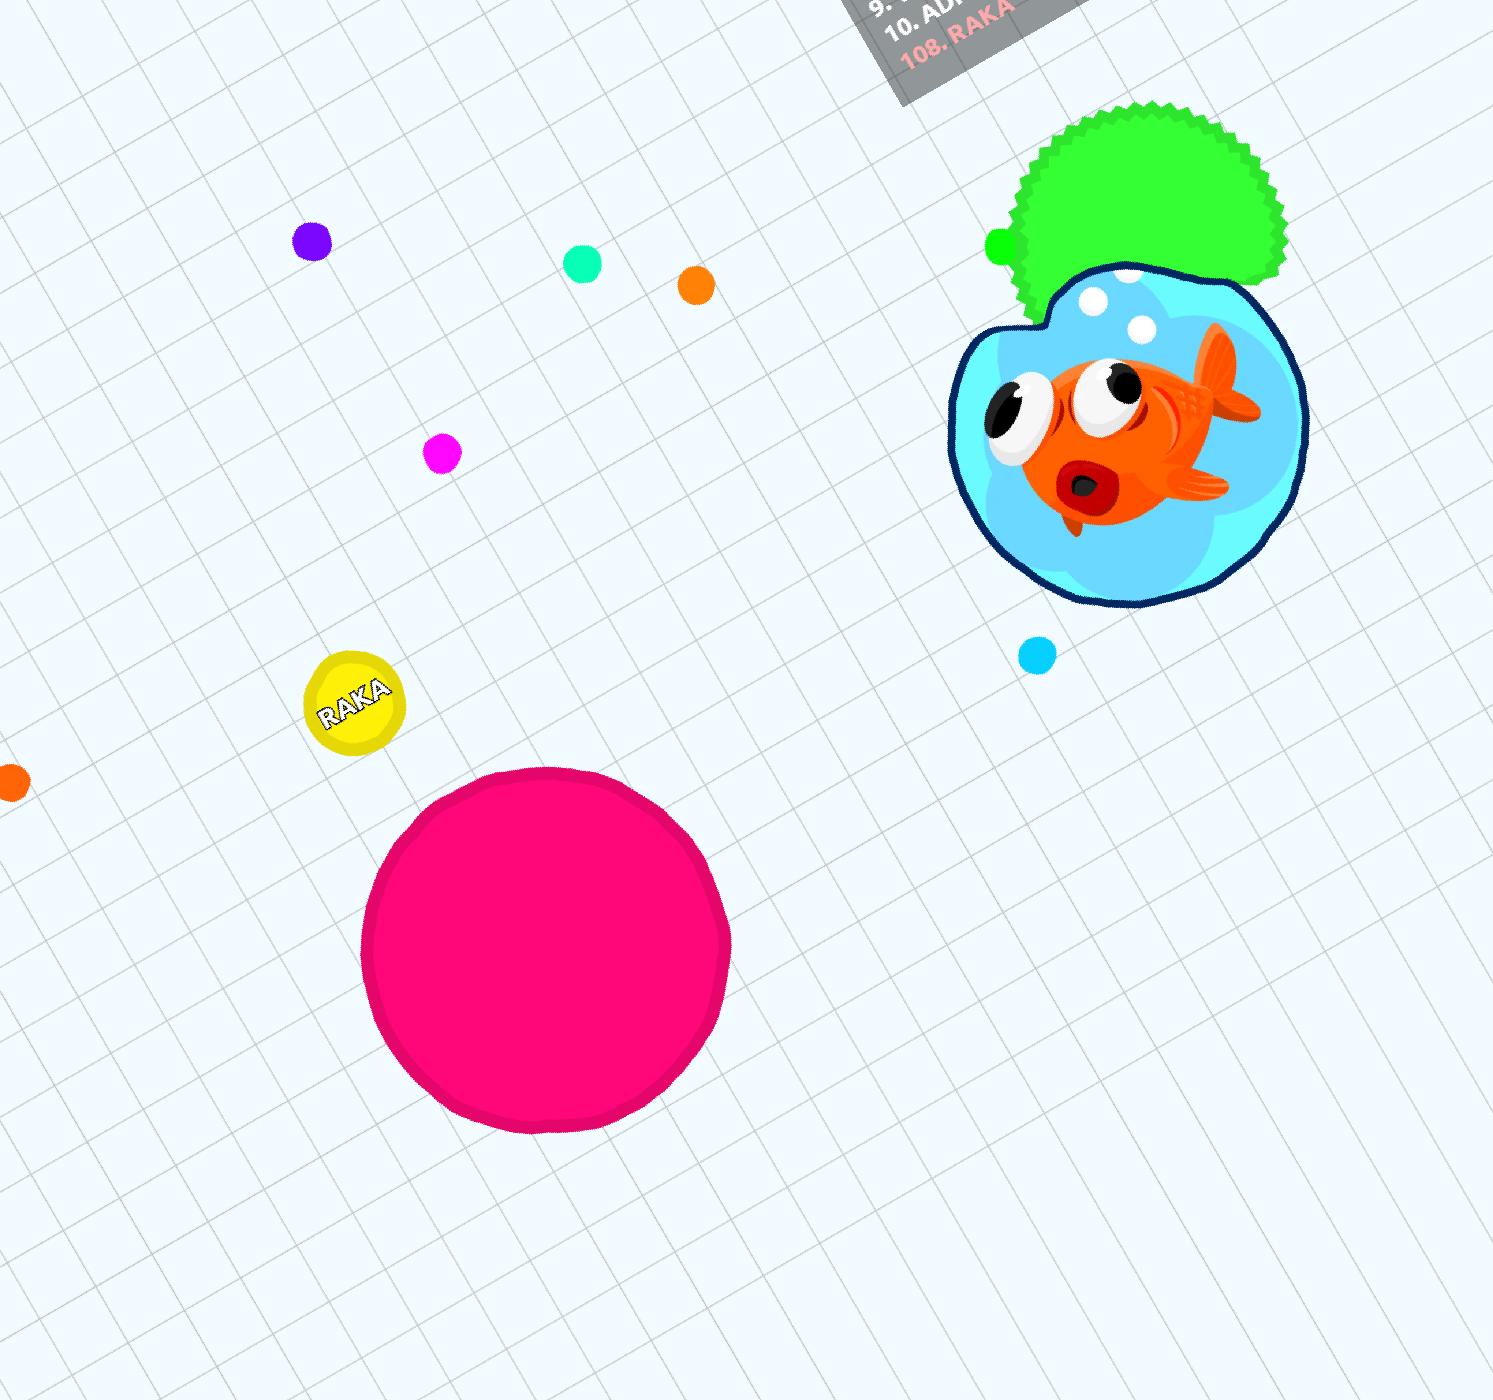

In [13]:
img2 = Image.fromarray(big)
img2.rotate(30).crop((s1+w/3, s0, s1+w, s0+h))

In [17]:
from tqdm.notebook import tqdm
for i in tqdm(range(360)):
    img2.rotate(i).crop((s1+w/3, s0, s1+w, s0+h)).save(f'rot_pics/{i}.png')
    

  0%|          | 0/360 [00:00<?, ?it/s]

fu

In [21]:
!ffmpeg -r 6 -i rot_pics/%d.png pov.mp4

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-amf --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt
  libavutil 

In [56]:
def focus_dir(img, angle):
    '''Focus the POV of the image towards a certain direction
    Takes in a PIL image and angle in degrees
    Returns an image with the center shifted to the left and the image rotated so the angle direction is to the right
    The fill values after rotation are based on the edge values'''
    colors = Counter(img.getdata())
    color = max(colors, key=lambda i: colors[i])
    color = np.asarray(color).astype(np.uint8)
    w,h = img.size
    d = ceil(np.linalg.norm(img.size))
    img_arr = np.asarray(img)
    del(img)
    top = img_arr[0]
    bot = img_arr[-1]
    lef = img_arr[:,0]
    rig = img_arr[:,-1]
    s0 = (d-h)//2
    s1 = (d-w)//2
    big = np.array([[color]*d]*d)
    # print(big.dtype)
    big[s0:s0+h, 0:s1] = np.stack([lef]*s1, axis=1)
    big[s0:s0+h, s1+w:] = np.stack([rig]*(d-s1-w), axis=1)
    big[0:s0, s1:s1+w] = np.stack([top]*s0)
    big[s0+h:, s1:s1+w] = np.stack([bot]*(d-s0-h))
    big[s0:s0+h, s1:s1+w] = img_arr
    del(img_arr)
    img2 = Image.fromarray(big)
    del(big)
    return img2.rotate(angle).crop((s1+w/3, s0, s1+w, s0+h))
    

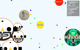

In [68]:
img = Image.open("data_imitation/0000000018-1307x907.png")
w,h = img.size
n = 50
w = n*w//h
h = n
img = img.resize((w,h))
img

In [115]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
%matplotlib qt

plt.axis('off')
img2 = focus_dir(img, 0)
plt.title(f'Image shape: {img2.size}')

def draw(i):
    img2 = focus_dir(img, i)
    return [plt.imshow(img2)]
anime = ani.FuncAnimation(
    plt.gcf(), draw, range(360),
    interval=10,
    blit=True
    )
plt.show()

In [114]:
import time
import pyautogui as pag
from math import atan2, pi
# while(True):
pos = pag.position()
size = pag.size()
x = pos[0] - size[0]/2
y = pos[1] - size[1]/2
atan2(y,x) / pi * 180
    # time.sleep(1)

-4.6326302280960165